# Logistic Regresion (Lecture: 03)

__Author__: Pablo César Rodríguez Aguayo

__Subject__: Machine Learning

__Date__: 12/03/2018

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn import datasets
import scipy.optimize as opt

%matplotlib inline

 By doing this, we will be able to study the effect of each feature on the dependent variable 

In [2]:
data = pd.read_csv('heart.csv')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
normalize = lambda x: (x-x.mean())/x.std()

In [5]:
train, test = train_test_split(data, test_size=0.3)
m, n = train.shape
error_train = np.zeros(n)

nx_train = train.iloc[:,0:-1].values
ny_train = train.iloc[:,-1].values
# ---- 
nx_test = test.iloc[:,:-1].values
ny_test = test.iloc[:,-1].values

ny_train = ny_train.reshape(-1,1)
ny_test = ny_test.reshape(-1,1)

nx_train = normalize(nx_train)
nx_test = normalize(nx_test)

nx_train = np.append(np.ones(shape=(nx_train.shape[0],1)),nx_train,axis = 1)
nx_test = np.append(np.ones(shape=(nx_test.shape[0],1)),nx_test,axis = 1)

## Data Visualization

In [6]:
#infected = data.iloc[ny_train == 1]
#not_infected = data.iloc[ny_train == 0]

# plots
#plt.scatter(infected.iloc[:, 0], infected.iloc[:, 1], s=10, label='Infected')
#plt.scatter(not_infected.iloc[:, 0], not_infected.iloc[:, 1], s=10, label='Not infected')
#plt.legend()
#plt.show()

## Sigmoid

In [7]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))

## Hyphotesis

In [8]:
def calculate_hyphotesis(x, theta):
    return sigmoid(np.dot(x, theta))

## Cost Function

In [9]:
def cost_function(theta, x, y):
    m, n = x.shape
    theta = theta.reshape(n,1)
    infunc = -y*(np.log(calculate_hyphotesis(x,theta))) - (1-y)*(np.log(1 - calculate_hyphotesis(x,theta)))
    return np.sum(infunc)/m

## Gradient Descent

In [10]:
def compute_gradient(theta,x,y):
    m, n = x.shape
    theta = theta.reshape(n,1)
    gradient =  np.dot(x.transpose(), calculate_hyphotesis(x,theta)-y)/m
    return gradient.flatten()

In [11]:
def calculate_theta(x, y, theta_):
    theta = opt.minimize(fun=cost_function, x0=theta_, args=(x, y), method='TNC', jac=compute_gradient)
    theta = theta.x
    return theta

## Predictions on Probabilities

In [12]:
def predict_probs(x, theta):
    return calculate_hyphotesis(x, theta)

def predict(x, theta, threshold=0.5):
    return 1*(predict_probs(x, theta) >= threshold)

In [13]:
theta = calculate_theta(nx_train, ny_train, np.zeros(n))
%time y_hat = predict(nx_train, theta)
y_hat

CPU times: user 290 µs, sys: 57 µs, total: 347 µs
Wall time: 370 µs


array([0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1])

## Curva 01: Bias & Variance

In [14]:
train_error = np.zeros(n)
test_error = np.zeros(n)

_theta = np.zeros(n)

for i in range(1, n):
    train_ = nx_train[:,0:i]
    test_ = nx_test[:,0:i]
    theta_ = _theta[0:i]
    
    theta = calculate_theta(x=train_, y=ny_train, theta_=theta_)
    
    hyph_train = predict(train_, theta)
    hyph_test = predict(test_, theta)
    
    train_error[i] = mean_squared_error(hyph_train, ny_train)
    test_error[i] = mean_squared_error(hyph_test, ny_test)


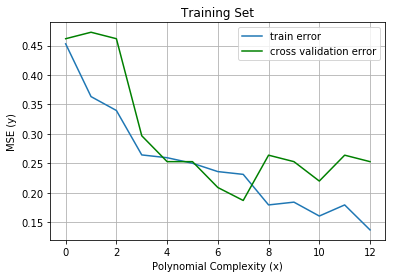

In [15]:
plt.plot(np.arange(n-1),train_error[1:], label = 'train error')
plt.plot(np.arange(n-1),test_error[1:], label = 'cross validation error', color= 'green')
plt.title('Training Set')
plt.xlabel('Polynomial Complexity (x)')
plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()

In [16]:
# Curva 02
train_error = np.zeros(nx_test.shape[0])
test_error = np.zeros(nx_test.shape[0])

theta = calculate_theta(x=nx_train, y=ny_train, theta_=np.zeros(nx_test.shape[1]))

for i in range(1, nx_test.shape[0]):
    hyph_train = predict(nx_train[0:i,:], theta)
    hyph_test = predict(nx_test[0:i,:], theta)
    
    train_error[i] = mean_squared_error(hyph_train, ny_train[0:i,])
    test_error[i] = mean_squared_error(hyph_test, ny_test[0:i,])    

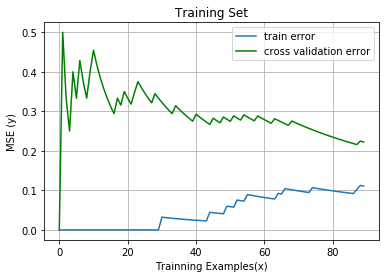

In [17]:
plt.plot(np.arange(test_error.shape[0]-1),train_error[1:], label = 'train error')
plt.plot(np.arange(test_error.shape[0]-1),test_error[1:], label = 'cross validation error', color='green')
plt.title('Training Set')
plt.xlabel('Trainning Examples(x)')
plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()

## Curva 03: Specificity & Sensitivity(Polinomial Complexity)

In [18]:
# calculate vals
def calculate_vals(y_hat, y):
    # True Positive (TP)
    TP = np.sum(np.logical_and(y_hat == 1, y == 1))

    # True Negative (TN)
    TN = np.sum(np.logical_and(y_hat == 0, y == 0))

    # False Positive (FP)
    FP = np.sum(np.logical_and(y_hat == 1, y == 0))

    # False Negative (FN)
    FN = np.sum(np.logical_and(y_hat == 0, y == 1))

    return [TP, TN, FP, FN]

# calculate_TPR
def calculate_TPR(values):
    return values[0]/(values[0] + values[3])


# calculate_TNR
def calculate_TNR(values):
    return values[1]/(values[2] + values[1])


# calculate_FPR
def calculate_FPR(values):
    return values[2]/(values[2] + values[3])

In [42]:
# ----- SENSITIVITY ----- 
TPR_train = np.zeros(n)
TPR_test = np.zeros(n)
# ----- SPECIFICITY -----
TNR_train = np.zeros(n)
TNR_test = np.zeros(n)
# ----- 1 - SPECIFICITY -----
FPR_train = np.zeros(n)
FPR_test = np.zeros(n)

_theta = np.zeros(n)

for i in range(1, n):
    train_ = nx_train[:,0:i]
    test_ = nx_test[:,0:i]
    theta_ = _theta[0:i]
    
    theta = calculate_theta(x=train_, y=ny_train, theta_=theta_)
    
    hyph_train = predict(train_, theta)
    hyph_test = predict(test_, theta)
    
    hyph_train_vals = calculate_vals(hyph_train, ny_train)
    hyph_test_vals = calculate_vals(hyph_test, ny_train)
    
    TPR_train[i] = calculate_TPR(hyph_train_vals)
    TNR_train[i] = calculate_TNR(hyph_train_vals)
    FPR_train[i] = calculate_FPR(hyph_train_vals) 
    
    TPR_test[i] = calculate_TPR(hyph_test_vals)
    TNR_test[i] = calculate_TNR(hyph_test_vals)
    FPR_test[i] = calculate_FPR(hyph_train_vals)


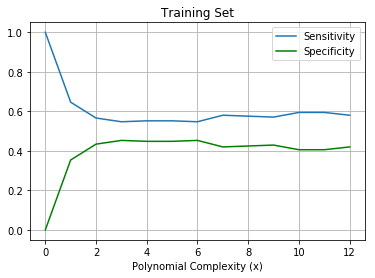

In [20]:
plt.plot(np.arange(n-1),TPR_train[1:], label = 'Sensitivity')
plt.plot(np.arange(n-1),TNR_train[1:], label = 'Specificity', color= 'green')
plt.title('Training Set')
plt.xlabel('Polynomial Complexity (x)')
# plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()

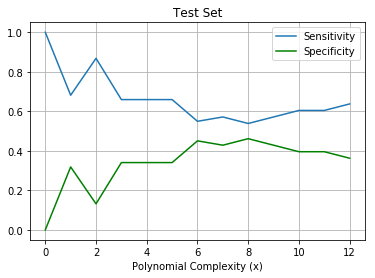

In [21]:
plt.plot(np.arange(n-1),TPR_test[1:], label = 'Sensitivity')
plt.plot(np.arange(n-1),TNR_test[1:], label = 'Specificity', color= 'green')
plt.title('Test Set')
plt.xlabel('Polynomial Complexity (x)')
# plt.ylabel('MSE (y)')
plt.grid()
plt.legend()
plt.show()

## ROC